# L5: Graph theory

In [1]:

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl

from IPython.display import display, Math

In [3]:
def get_filename(filename: str, lecture_id: int = 1, file_extension: str = '.png') -> str:
    return f"L{lecture_id}_{filename}{file_extension}"

outdir = '../figures/'
lecture_id = 5

In [521]:
'''
------------------------------------------
            SETTINGS
------------------------------------------
'''
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-v0_8-white')
plt.rcParams['font.family'] = 'PT Sans'
# plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 12

ms = 100 # marker size
fs = 20 # fontsize
dpi = 100
BLUE = "#2a475e"

# 1. Investigate networks

In [5]:
seed = 10
prng = np.random.RandomState(seed)


## 1.a Generate and visualize networks

Let's start by visualizing some toy example networks and getting familiar with [`networkx`](https://networkx.org/documentation/stable/index.html).

We generate some [examples](https://networkx.org/documentation/stable/reference/generators.html) directly using `networkx` library. 

In [6]:
G = []
pos = [] # stores the positions, for visualization
title = ['Star','Grid','Geometric','Erdős-Rényi', 'Tree']

# Star
N = 10
G.append(nx.star_graph(N))
pos.append(nx.spring_layout(G[-1], iterations=100, seed=seed))

# Grid 
d = 4
G.append(nx.grid_2d_graph(d, d) )
pos.append(nx.spring_layout(G[-1], iterations=100, seed=seed))

# Geometric
N = 50
G.append(nx.random_geometric_graph(N, 0.2, seed=seed))
# position is stored as node attribute data for random_geometric_graph
pos.append(nx.get_node_attributes(G[-1], "pos"))

# ER
N = 20
p = 0.2
G.append(nx.erdos_renyi_graph(N, p, seed=seed))
pos.append(nx.spring_layout(G[-1], iterations=100, seed=seed))

# Tree
N = 20
G.append(nx.random_labeled_rooted_tree(N))
pos.append(nx.spring_layout(G[-1], iterations=100, seed=seed))

In [7]:
filename = 'network_examples'
outfile = get_filename(filename,lecture_id=lecture_id)

In [8]:
L = len(G) # number of graph types
width = 4
height = width
nrows = 1
ncols = int(np.ceil(L / nrows))
nc = 'white'
ec = BLUE
ew = 5

Figure saved in ../figures/L5_network_examples.png


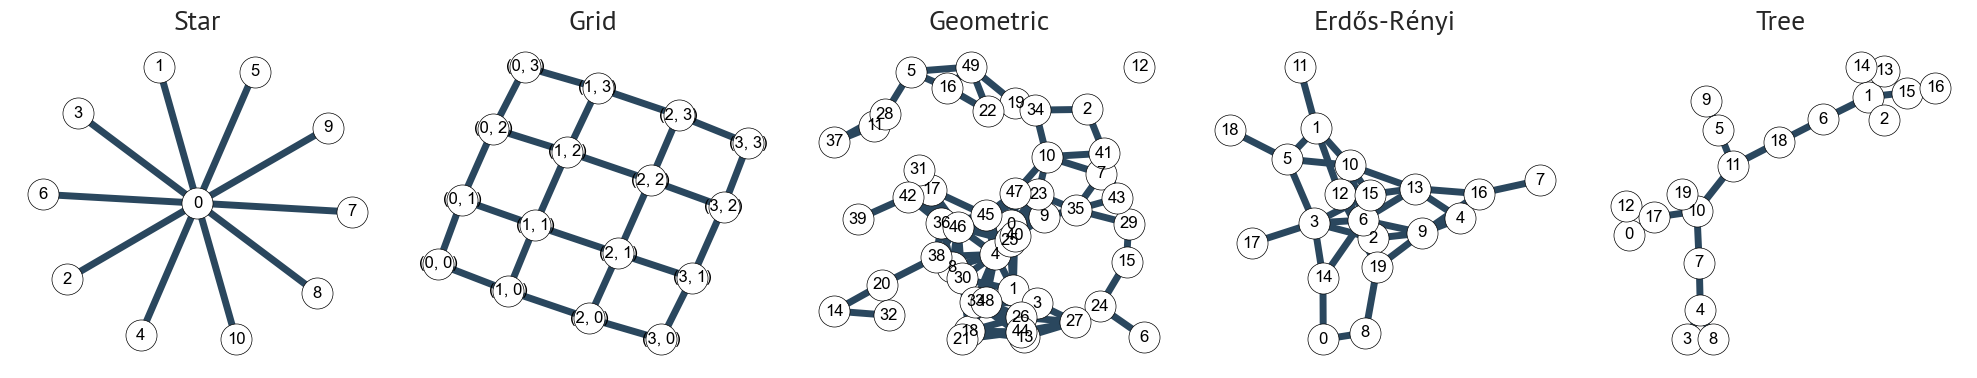

In [9]:
fig,ax = plt.subplots(nrows,ncols, figsize=(width * ncols,  height * nrows))

for i in np.arange(L):
    nx.draw_networkx_nodes(G[i], pos[i], node_size=500, edgecolors='black', node_color=nc,ax=ax[i])
    nx.draw_networkx_labels(G[i], pos[i], font_size=12, ax=ax[i])
    
    edges = nx.draw_networkx_edges(G[i], pos[i], ax=ax[i], 
                                   edge_color=ec,
                                    width=ew)
    
    ax[i].set_axis_off()
    ax[i].set_title(title[i],fontsize=fs)

plt.tight_layout()

if outfile is not None:
    
    plt.savefig(f"{outdir}{outfile}", dpi=dpi, format=None, metadata=None,
                bbox_inches='tight', pad_inches=0.1,
                facecolor='auto', edgecolor='auto',
                backend=None
                )
    print(f"Figure saved in {outdir}{outfile}")
        
plt.show()

## 1.b Visualize adjacency matrix $A$

We can extract it directly from `networkx`

In [10]:
A = [nx.adjacency_matrix(g) for g in G]

Now let's visualize

In [11]:
filename = 'A_network_examples'
outfile = get_filename(filename,lecture_id=lecture_id)

In [12]:
cmap='PuBuGn'


In [13]:
A[0]

<Compressed Sparse Row sparse array of dtype 'int64'
	with 20 stored elements and shape (11, 11)>

Figure saved in ../figures/L5_A_network_examples.png


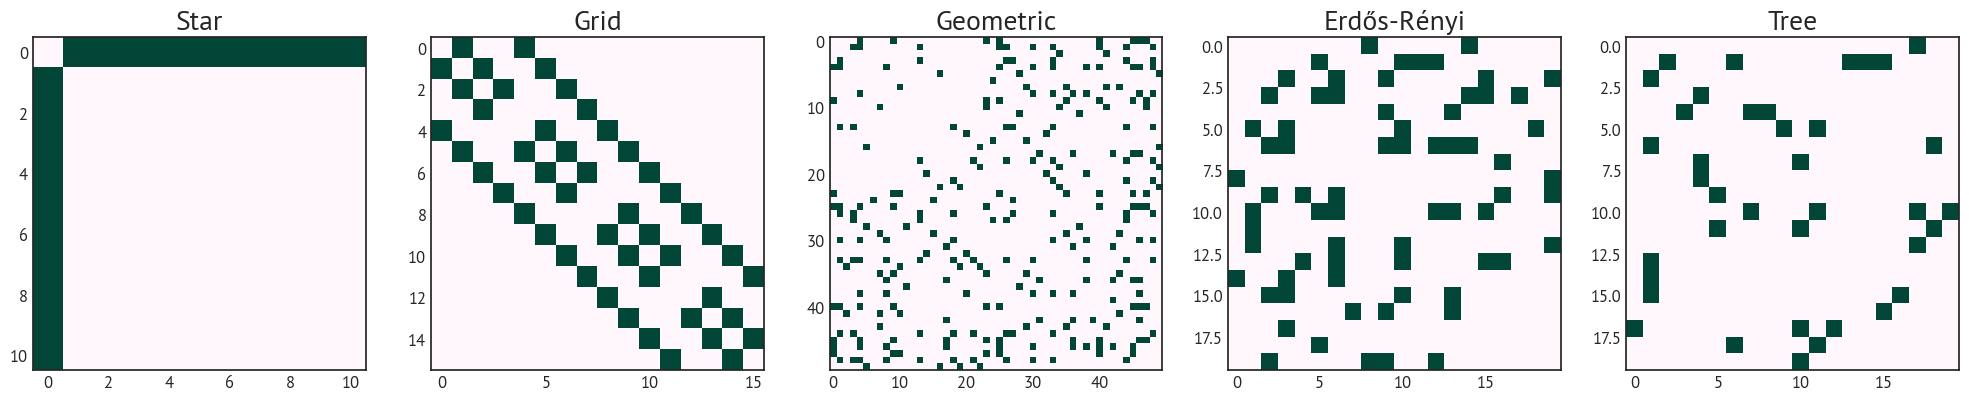

In [14]:
fig,ax = plt.subplots(nrows,ncols, figsize=(width * ncols,  height * nrows))

for i in np.arange(L):
    ax[i].imshow(A[i].toarray(), cmap=cmap)
    ax[i].set_title(title[i],fontsize=fs)
    
plt.tight_layout()

if outfile is not None:
    
    plt.savefig(f"{outdir}{outfile}", dpi=dpi, format=None, metadata=None,
                bbox_inches='tight', pad_inches=0.1,
                facecolor='auto', edgecolor='auto',
                backend=None
                )
    print(f"Figure saved in {outdir}{outfile}")
        
plt.show()


## 1.c Get paths between two nodes in one of these graphs.
There are at most $M_{N} =  \lfloor{e (N-2) !\rfloor}$ of them (in the complete graph), but let's see some examples
by using the function [`all_simple_paths`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.simple_paths.all_simple_paths.html)

Let's start with the **star** example

In [15]:
i = 0
source = 1
target = 10
paths = [p for p in nx.all_simple_paths(G[i], source=0, target=3)]
print(f"# paths = {len(paths)}")

# paths = 1


Try to change source and target nodes... there is alway 1 path!  
Let's try with the **grid**.

In [16]:
i = 1
G[1].nodes()

NodeView(((0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)))

In [17]:
source = (0,0)
target = (3,3)
paths = [p for p in nx.all_simple_paths(G[i], source=source, target=target)]
print(f"# paths = {len(paths)}")


# paths = 184


In [18]:
H_p = np.array([len(p) for p in paths]) # hopcount distribution

Let's plot some examples.

In [19]:
pid = prng.choice(len(paths),size=1)[0]
pid = np.argmax(H_p)
pid = np.argmin(H_p)
print(pid)
ref_path = [list(path) for path in map(nx.utils.pairwise, paths[pid:pid+1])][0]

hopcount = len(ref_path)
print(f"hopcount={hopcount}")

27
hopcount=6


First, we need to _color_ source, target and edges in the path

In [20]:
def assign_node_color(n: int, source: int = -1, target: int = -1,
                      color_source = 'red', color_target = 'green', color: str = 'white')-> str:
    if n == source:
        return color_source
    if n == target:
        return color_target
    return color

In [21]:
edge_colors = [ BLUE if (e not in ref_path) and ((e[1],e[0]) not in ref_path) else 'r' for e in G[i].edges() ]
widths = [ 1 if (e not in ref_path) and ((e[1],e[0]) not in ref_path) else 10 for e in G[i].edges() ]
node_colors = [assign_node_color(n,source=source,target=target) for n in G[i].nodes()]

Now we can visualize one path

In [22]:
filename = f'path_example_{pid}'
outfile = get_filename(filename,lecture_id=lecture_id)

Figure saved in ../figures/L5_path_example_27.png


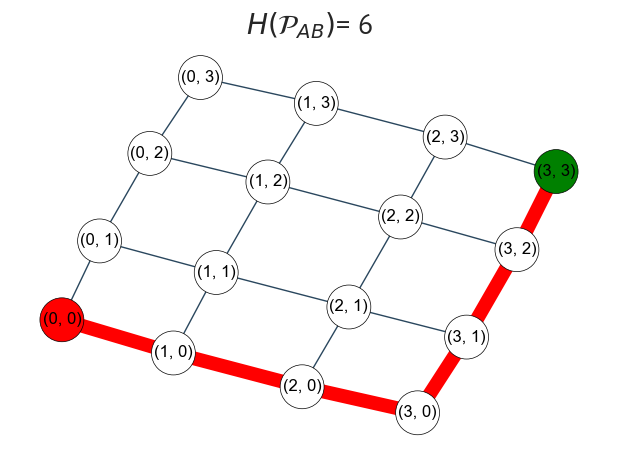

In [23]:
fig, ax = plt.subplots()

nx.draw_networkx_nodes(G[i], pos[i], node_size=1000, edgecolors='black', node_color=node_colors)
nx.draw_networkx_labels(G[i], pos[i], font_size=12)

edges = nx.draw_networkx_edges(G[i], pos[i], ax=ax, edge_cmap=cm.Blues, edge_color=edge_colors,
                              width=widths)


ax.set_title(r'$H(\mathcal{P}_{AB})$' + f"= {len(ref_path)}")
ax.set_axis_off()

plt.tight_layout()

if outfile is not None:
    
    plt.savefig(f"{outdir}{outfile}", dpi=dpi, format=None, metadata=None,
                bbox_inches='tight', pad_inches=0.1,
                facecolor='auto', edgecolor='auto',
                backend=None
                )
    print(f"Figure saved in {outdir}{outfile}")
        
plt.show()

You can play by selecting other paths or other sources and targets (or other graphs)

## 1.d Find how many edges\nodes do you need to disconnect the graph
We need to compute $\lambda(G)$ and $\kappa(G)$.  
We can compare them and with $d_{min}(G)$.

In [24]:
for i in range(L):
    msg = f"{title[i]}:"
    msg = msg + r'\kappa(G)' + f"={nx.node_connectivity(G[i])}\\,|\\,"
    msg = msg + r'\lambda(G)' + f"={nx.edge_connectivity(G[i])} \\,|\\,"
    msg = msg + r'd_{min}(G)' + f"={np.min([G[i].degree[n] for n in G[i].nodes()])}"
    display(Math(msg))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Note that:
- the _geometric_ graph has 0s, that's because it is already disconnected!
- the _tree_ has all 1, this is an extreme case as it has no loops to create redundancy

## 2. Erdös-Rényi random graphs
Let's get familiar with the ER graph. 


### 2.1 Method 1: $G_p(N)$
Where $p$ is the probability of sampling an edge over all the possible $L_{max} = {{N}\choose{2}} $.  
We already encountered en example before.

You can play with $p$ and see how the graph changes.

In [105]:
N = 20
p = 0.2
G = nx.erdos_renyi_graph(N, p, seed=seed)
pos = nx.spring_layout(G, iterations=100, seed=seed)

L_max = N * (N - 1) / 2
print(f"L = {G.number_of_edges()}\nExp[L] = {p * L_max}")

L = 35
Exp[L] = 38.0


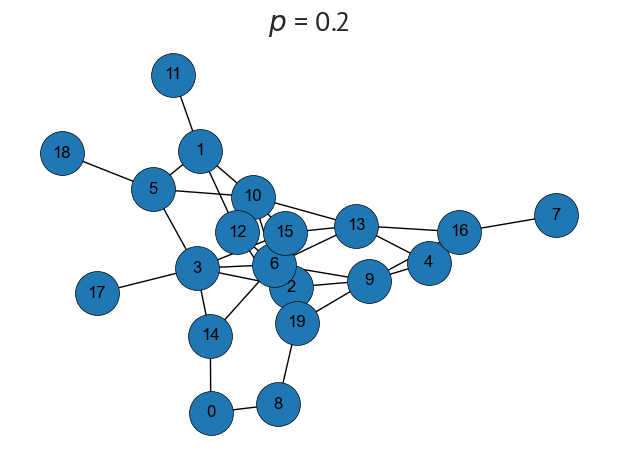

In [106]:
outfile = None

fig, ax = plt.subplots()

nx.draw_networkx(G, pos, node_size=1000, edgecolors='black')

ax.set_title(r'$p$' + f" = {p}")
ax.set_axis_off()

plt.tight_layout()

if outfile is not None:
    
    plt.savefig(f"{outdir}{outfile}", dpi=dpi, format=None, metadata=None,
                bbox_inches='tight', pad_inches=0.1,
                facecolor='auto', edgecolor='auto',
                backend=None
                )
    print(f"Figure saved in {outdir}{outfile}")
        
plt.show()

Let's see how is the **degree distribution**

In [107]:
def ecdf(a): # empirical CDF
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

In [108]:
degrees = np.array([val for (node, val) in G.degree()])
degree_cdf_x, degree_cdf_y = ecdf(degrees)

Compare with the theoretical one, that is a binomial distribution with parameters $N-1$ and $p$

In [109]:
from scipy.stats import binom

In [110]:
xs = np.arange(N-1)
ys = binom.pmf(xs, N-1, p)
ys_cdf = binom.cdf(xs, N-1, p)

min_x,max_x = degrees.min(),degrees.max()

<Figure size 640x480 with 0 Axes>

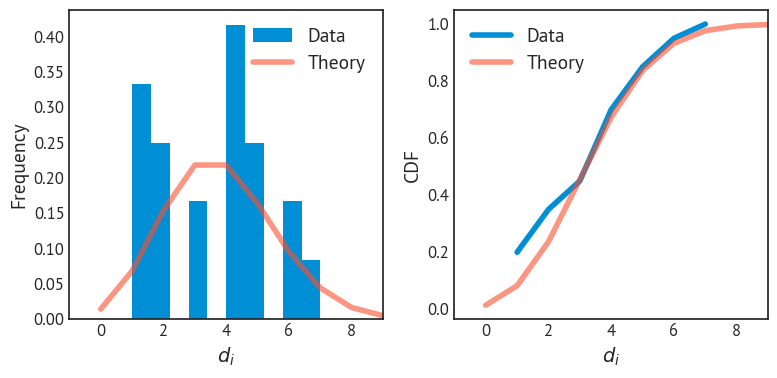

In [111]:
pad = 2
plt.figure()

fig,ax = plt.subplots(1,2,figsize=(8,4))

ax[0].hist(degrees, label = 'Data',density=True)
ax[0].plot(xs,ys, label='Theory',alpha=0.6)
ax[0].set_xlabel(r'$d_i$')
ax[0].set_ylabel('Frequency')
ax[0].set_xlim(min_x - pad, max_x + pad)

ax[0].legend()

ax[1].plot(degree_cdf_x, degree_cdf_y, label = 'Data')
ax[1].plot(xs, ys_cdf, label='Theory',alpha=0.6)
ax[1].set_xlabel(r'$d_i$')
ax[1].set_ylabel('CDF')
ax[1].set_xlim(min_x - pad, max_x + pad)

ax[1].legend()

plt.tight_layout()

### 2.2 Method 2: $G_r(N,L)$
The number of edges $L$ is now fixed!  
For better comparison, let's fix it equal to either $p L_{max}$ or to the empirical $L$ for the previous graph, 
generated with $G_p(N)$.

In [112]:
seed = 10
L = p * L_max # either p * L_max or L
G_nl = nx.gnm_random_graph(N, L, seed=seed)
pos_nl = nx.spring_layout(G, iterations=100, seed=seed)

In [113]:
assert G_nl.number_of_edges() == L
print(f"L = {G_nl.number_of_edges()}\nExp[L] = {p * L_max}")

L = 38
Exp[L] = 38.0


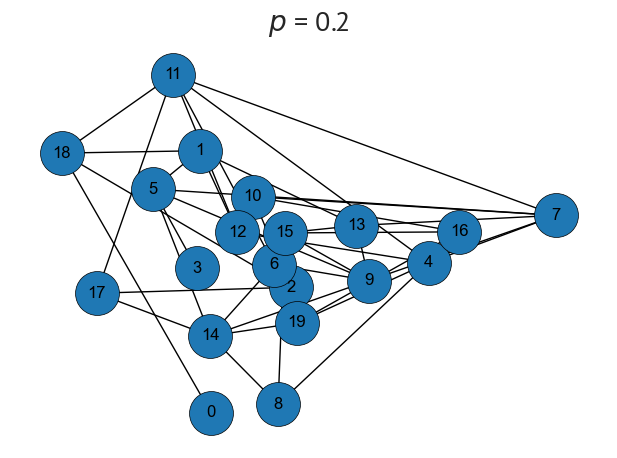

In [114]:
outfile = None

fig, ax = plt.subplots()

nx.draw_networkx(G_nl, pos_nl, node_size=1000, edgecolors='black')

ax.set_title(r'$p$' + f" = {p}")
ax.set_axis_off()

plt.tight_layout()

if outfile is not None:
    
    plt.savefig(f"{outdir}{outfile}", dpi=dpi, format=None, metadata=None,
                bbox_inches='tight', pad_inches=0.1,
                facecolor='auto', edgecolor='auto',
                backend=None
                )
    print(f"Figure saved in {outdir}{outfile}")
        
plt.show()

And let's see how is the **degree distribution** distributed in this case...

In [115]:
degrees_nl = np.array([val for (node, val) in G_nl.degree()])
degree_nl_cdf_x, degree_nl_cdf_y = ecdf(degrees_nl)

<Figure size 640x480 with 0 Axes>

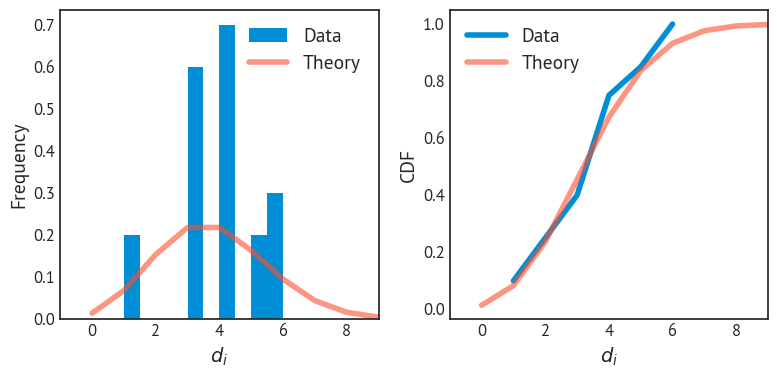

In [116]:
pad = 2
plt.figure()

fig,ax = plt.subplots(1,2,figsize=(8,4))

ax[0].hist(degrees_nl, label = 'Data',density=True)
ax[0].plot(xs,ys, label='Theory',alpha=0.6)
ax[0].set_xlabel(r'$d_i$')
ax[0].set_ylabel('Frequency')
ax[0].set_xlim(min_x - pad, max_x + pad)

ax[0].legend()

ax[1].plot(degree_nl_cdf_x, degree_nl_cdf_y, label = 'Data')
ax[1].plot(xs, ys_cdf, label='Theory',alpha=0.6)
ax[1].set_xlabel(r'$d_i$')
ax[1].set_ylabel('CDF')
ax[1].set_xlim(min_x - pad, max_x + pad)

ax[1].legend()

plt.tight_layout()

Let's try now with a real graph.   
We can download examples from [this website](https://websites.umich.edu/~mejn/netdata/)

In [118]:
import urllib.request
import io
import zipfile

In [169]:
dataset = 'as-22july06' # interner dataset
# dataset = 'netscience' # scientific collaborations
url = f"http://www-personal.umich.edu/~mejn/netdata/{dataset}.zip"

sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read(f"{dataset}.txt").decode()  # read info file
gml = zf.read(f"{dataset}.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)  # parse gml data

Before attempting to visualize, better to check its size!

In [170]:
L = G.number_of_edges()
N = G.number_of_nodes()

L_max = N * (N - 1) / 2

print(f"N = {N}, L = {L}")

N = 1589, L = 2742


We can always visualize the degree distribution

In [171]:
degrees = np.array([val for (node, val) in G.degree()])
degree_cdf_x, degree_cdf_y = ecdf(degrees)

But first, to have a meaningful comparison with an ER, we should choose a proper $p$.   
For this, we can use the density $p=L/L_{max}$

In [172]:
p = L / L_max

In [173]:
xs = np.arange(N-1)
ys = binom.pmf(xs, N-1, p)
ys_cdf = binom.cdf(xs, N-1, p)

min_x,max_x = degrees.min(),degrees.max()

<Figure size 640x480 with 0 Axes>

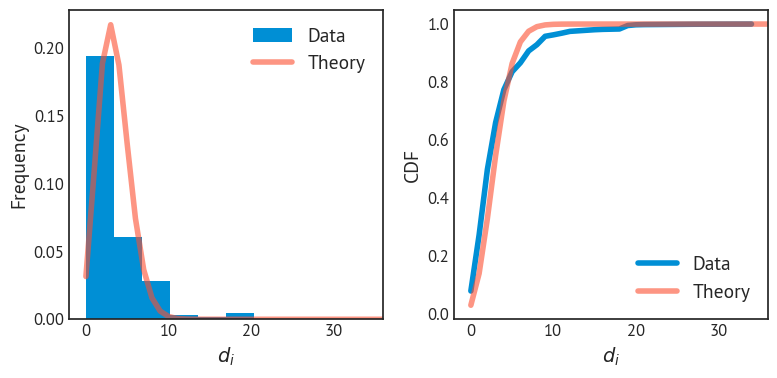

In [174]:
pad = 2
plt.figure()

fig,ax = plt.subplots(1,2,figsize=(8,4))

ax[0].hist(degrees, label = 'Data',density=True)
ax[0].plot(xs,ys, label='Theory',alpha=0.6)
ax[0].set_xlabel(r'$d_i$')
ax[0].set_ylabel('Frequency')
ax[0].set_xlim(min_x - pad, max_x + pad)

ax[0].legend()

ax[1].plot(degree_cdf_x, degree_cdf_y, label = 'Data')
ax[1].plot(xs, ys_cdf, label='Theory',alpha=0.6)
ax[1].set_xlabel(r'$d_i$')
ax[1].set_ylabel('CDF')
ax[1].set_xlim(min_x - pad, max_x + pad)

ax[1].legend()

plt.tight_layout()

We do not really see much...

This is because we have few nodes with very large degree, but many with small degree.  



In [175]:
np.unique(degrees,return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17,
        18, 19, 20, 21, 27, 34]),
 array([128, 307, 358, 257, 180,  98,  49,  65,  34,  46,   8,   9,  10,
          6,   3,   2,   1,   1,  19,   4,   1,   2,   1]))

You can see this with the quantiles, most of the probability distribution is concentrated on very small degrees!

In [176]:
np.quantile(degrees,0.95)

np.float64(9.0)

We can now better zoom in the plot 

In [184]:
max_x = np.quantile(degrees,1)

<Figure size 640x480 with 0 Axes>

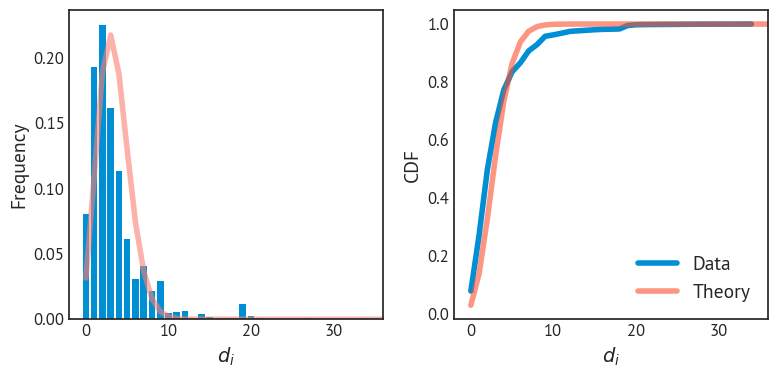

In [185]:
pad = 2
plt.figure()

fig,ax = plt.subplots(1,2,figsize=(8,4))

# ax[0].hist(degrees, label = 'Data',density=True,bins=degrees.max())
bar_x, bar_y = np.unique(degrees,return_counts = True)
ax[0].bar(bar_x, bar_y/bar_y.sum(), label = 'Data')
ax[0].plot(xs,ys, label='Theory',alpha=0.6,color = 'salmon')
ax[0].set_xlabel(r'$d_i$')
ax[0].set_ylabel('Frequency')
ax[0].set_xlim(min_x - pad, max_x + pad)

# ax[0].legend()

ax[1].plot(degree_cdf_x, degree_cdf_y, label = 'Data')
ax[1].plot(xs, ys_cdf, label='Theory',alpha=0.6)
ax[1].set_xlabel(r'$d_i$')
ax[1].set_ylabel('CDF')
ax[1].set_xlim(min_x - pad, max_x + pad)

ax[1].legend()

plt.tight_layout()

You can see how the binomial distribution is really not appropriate for this dataset...

#### Q: How about other datasets? 

You can download more and try with others

## 3. Connectivity of an ER graph
Let's focus now on assessing connectivity of an ER network.  
The smaller the $p$, the more likely the network is disconnected.  


### 3.1 Measuring probability of {$G$ is connected}
We learned:

$
Pr[G_{p}(N) \text{ connected} ]= Pr[d_{min}\geq 1] + o(1)
$

Let's see how does the function determining $Pr[d_{min} \geq 1]$ look like:

$Pr[d_{min} \geq 1] \approx (1 - (1-p)^{N-1} )^{N}$,  
where the $\approx$ comes from assuming independent degrees at each node.

In [511]:
def get_pdmin(p: float, N: int) -> float:
    '''
    Calculates the probability that the min degree is at least 1
    '''
    p = np.power(1 - np.power(1-p,N-1),N)
    assert (p >= 0) & (p <= 1)
    return p
    

Play with varying $N$

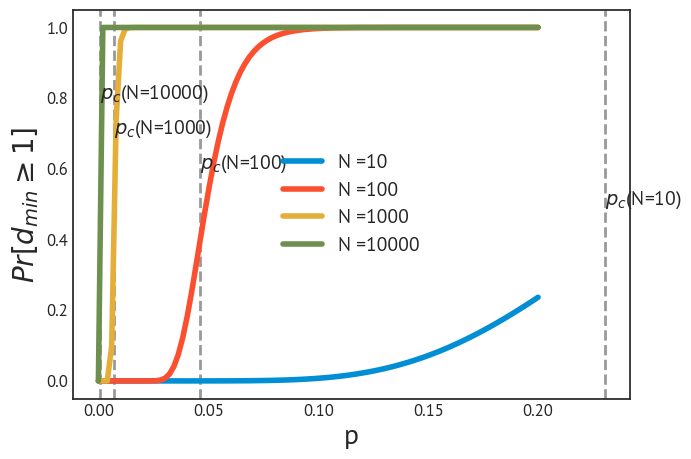

In [513]:
plt.figure()

eps = 0.1
xs = np.linspace(0,0.2,100)

for i, N in enumerate([10,100,1000,10000]):
   
    pc = np.log(N)/N
    
    
    ys = [get_pdmin(x,N) for x in xs]
    
    plt.axvline(pc, ls='--',lw=2,c='grey',alpha=0.8,zorder=0)
    plt.text(pc,0.5 + i * eps,r'$p_c$' +f"(N={N:.0f})")
    plt.plot(xs,ys, label=f'N ={N}')


plt.legend()
plt.xlabel('p',fontsize=fs)
plt.ylabel(r'$Pr[d_{min} \geq 1]$',fontsize=fs)
      
plt.show()

We also learned about the critical threshold: 

- $p_c \sim \frac{\log N}{N}$

This is the approximate value where we expect to see a **connected** network. 

In [515]:
def get_avg_d_from_pN(p: float, N: int) -> float:
    '''
    E[d] = 2L/N
    E[L] = p L_max
    --> E[d] = 2p L_max/N
    '''
    L_max = N * (N - 1) / 2
    d_avg = 2 * p * L_max / N
    return d_avg

def get_p_from_avg_dN(d_avg: float, N: int) -> float:
    '''
    it is more intuitive to work with d_avg and then 
    figure out what the corresponding p is
    E[d] = 2p L_max/N
    --> p = E[d] N/ (2L_max)
    '''
    L_max = N * (N - 1) / 2
    p = d_avg * N / (2 * L_max)
    return p

First, let's see some main stats

In [516]:
N = 100
pc = np.log(N)/N
d_avg_c = get_avg_d_from_pN(pc,N)
print(f'N = {N:.0f}')
print(f'p_c = {pc:.3f}\nd_c = {d_avg_c:.2f} (critical degree)')

N = 100
p_c = 0.046
d_c = 4.56 (critical degree)


Now we can vary $p$ and track the number of connected components.   
It can be more intuitive to vary $d_{avg}$, the average degree, instead of $p$.   
They are proportional, but  $d_{avg}$ has a more intuitive range.

### 3.2 The probability of being in the LCC

Before simulating some data, we should see what the **theory** says:

$
\mu_{G_{p}(N)} = \frac{\log(1-S)}{S}\quad.
$


$S= 1-e^{-\mu S}$,
where $\mu = p(N-1)$ is the expected degree.  
Note that from this, the expected size of the largest connected component (LCC) is $N S$.

In [478]:
def get_mu_from_S(S: float, eps = 1e-8)-> float:
    '''
    For mu there is an easier expression to calculate than 
    the equation for S (which is trascendental and requires more thoughts)
    '''
    assert 0 <= S <= 1

    return -np.log(1-S + eps) / (S + eps)

#### Method 1: using root-finding methods

In [446]:
from scipy.optimize import root_scalar

def def_root_S(x: float, mu: float)-> float:
    f = x - 1 + np.exp(-mu * x)
    return f
    
def get_S_from_mu_RF(mu: float, bracket = [0.00001,1.0],method='brentq')-> float:

    try:
        sol = root_scalar(def_root_S, bracket=bracket,args=(mu,),method=method)
        return sol.root
    except: 
        return 0.
    
d = 2.
S = get_S_from_mu_RF(d)
S

0.79681213002002

#### Method 2: using Lambert function

In [463]:
from scipy.special import lambertw

def get_S_from_mu_LW(mu: float, eps= 1e-9)-> float:
    '''
    We can solve it either with a graphical comparison (seeing when two curves intersect)
    or using:
    S = 1 + (1/c)W(−ce^{−c}) 
    where W(.) is the [Lambert W-function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.lambertw.html),
    and is defined as the solution to the equation W(z)eW(z) = z
    '''
    W = lambertw(-mu * np.exp(-mu))
    S = 1 + (1/mu) * W
    return S

d = 2.
S = get_S_from_mu_LW(d)
S

np.complex128(0.7968121300200199+0j)

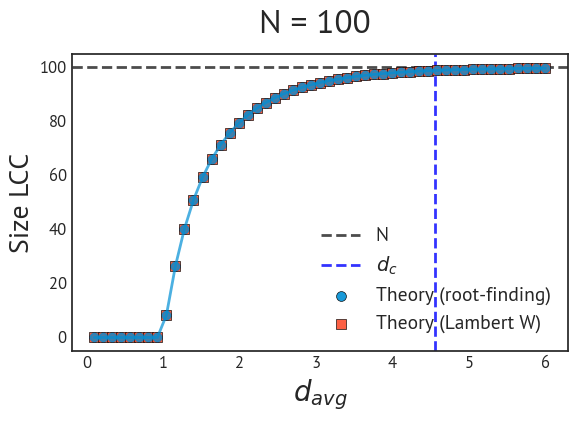

In [464]:
fig, ax = plt.subplots(figsize=(6,4))

max_d = 6.
min_d = 0.1
delta_d = int(max_d - min_d)
range_d =  np.linspace(min_d,max_d,delta_d * 10 + 1)

x = range_d
exp_S = [N * get_S_from_mu_RF(d) for d in x]
exp_S2 = [N * get_S_from_mu_LW(d) for d in x]

ax.axhline(N, ls='--',lw=2,c='black',label=r'N',alpha=0.7,zorder=0)
ax.axvline(vl, ls='--',lw=2,c='b',label=r'$d_c$',alpha=0.8,zorder=0)
ax.scatter(x,exp_S,s=50,edgecolor='black',label='Theory (root-finding)', marker='o',alpha=0.9)
ax.scatter(x,exp_S2,s=50,edgecolor='black',label='Theory (Lambert W)', marker='s',alpha=0.9)
ax.plot(x,exp_S,marker='o',alpha=0.7,lw=2)
ax.legend()
ax.set_xlabel(r'$d_{avg}$',fontsize = fs)
ax.set_ylabel(f"Size LCC",fontsize = fs)

fig.text(0.45,1.0,f"N = {N}",fontsize = fs +4)
plt.tight_layout()

### 3.3 How do networks in the interesting regimes look like?

We can highlight few examples for average degree:
1) $d < 1$ (all small tree-like component)
2) $d \sim 1$ (starting to see some larger components, but still small)
3) $1< d< d_c$ (giant component is forming, but still some small components)

In [502]:
range_d = [0.5,1.,1.5,4.5,5.]
seed = 10
G, pos = [],[]
title = []
for d in range_d:

    p = get_p_from_avg_dN(d,N)
    G.append(nx.erdos_renyi_graph(N, p, seed=seed))
    pos.append(nx.spring_layout(G[-1], iterations=10, seed=seed))
    title.append(r"$d_{avg}$"+f" = {d:.1f}")

In [503]:
filename = 'ER_network_examples'
outfile = get_filename(filename,lecture_id=lecture_id)
outfile

'L5_ER_network_examples.png'

Figure saved in ../figures/L5_ER_network_examples.png


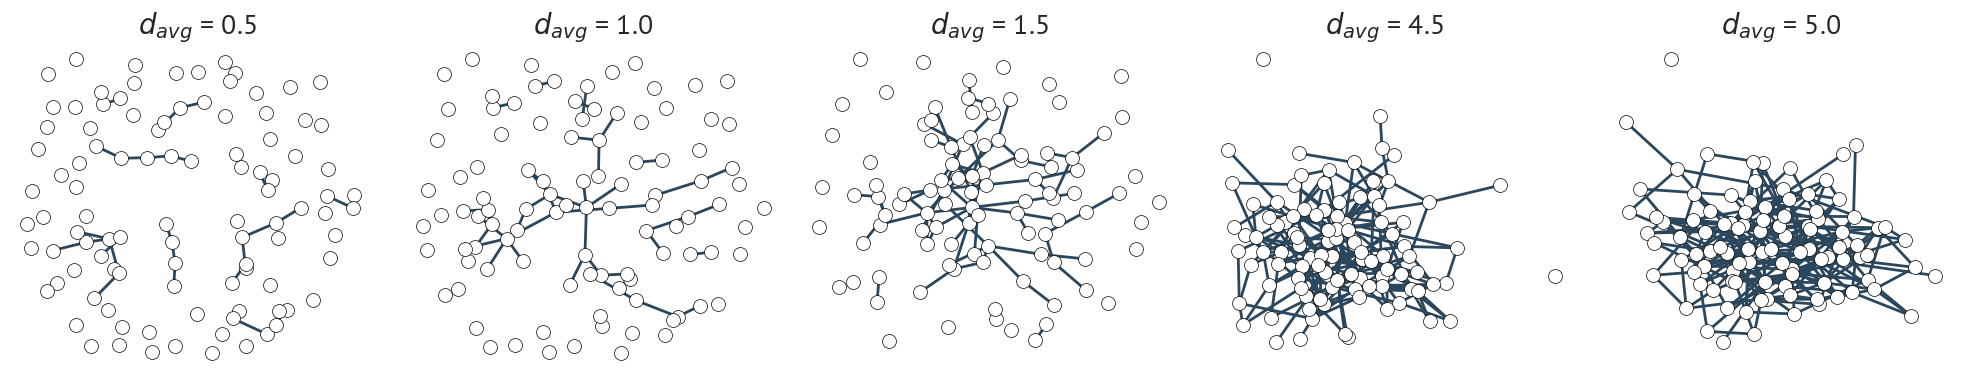

In [504]:
L = len(G) # number of graph types
width = 4
height = width
nrows = 1
ncols = int(np.ceil(L / nrows))
nc = 'white'
ec = BLUE
ew = 2

fig,ax = plt.subplots(nrows,ncols, figsize=(width * ncols,  height * nrows))

for i in np.arange(L):
    nx.draw_networkx_nodes(G[i], pos[i], node_size=100, edgecolors='black', node_color=nc,ax=ax[i])
    
    edges = nx.draw_networkx_edges(G[i], pos[i], ax=ax[i], 
                                   edge_color=ec,
                                    width=ew)
    
    ax[i].set_axis_off()
    ax[i].set_title(title[i],fontsize=fs)

plt.tight_layout()

if outfile is not None:
    
    plt.savefig(f"{outdir}{outfile}", dpi=dpi, format=None, metadata=None,
                bbox_inches='tight', pad_inches=0.1,
                facecolor='auto', edgecolor='auto',
                backend=None
                )
    print(f"Figure saved in {outdir}{outfile}")
        
plt.show()

Now we can compare with the **experiments**.  
First, let's generate **synthetic ER** with varying average degree.

In [527]:
N = 10000
# Get range of degrees
max_d = 6
min_d = 0.1
delta_d = int(max_d - min_d)
range_d =  np.linspace(min_d,max_d,delta_d * 5 + 1)

# Generate data
S = 1 # number of sampled graph per parameter set (p,N)
D = len(range_d)
ncc = np.zeros((D,S)).astype(int) # number of CC
lcc = np.zeros((D,S)) # size of the largest CC
seeds = np.zeros((D,S)).astype(int) # to be able to replicate the graph

for i, d in enumerate(range_d):
    p = get_p_from_avg_dN(d,N)
    for s in range(S):
        seed = prng.randint(1e5)
        G = nx.erdos_renyi_graph(N, p, seed=seed)
        seeds[i,s] = seed
        cc = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)] # this stores the size of each component
        ncc[i,s] = len(cc)
        lcc[i,s] = cc[0]


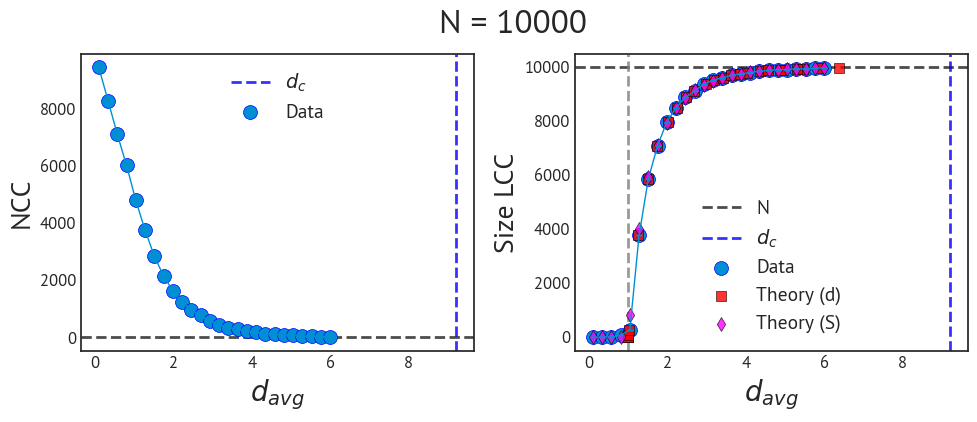

In [528]:
fig, ax = plt.subplots(1,2,figsize=(10,4))

pc = np.log(N)/N # critical threshold for connectivity
d_avg_c = get_avg_d_from_pN(pc,N) # degree at the critical threshold

x = range_d
vl = d_avg_c

# NCC
y = np.mean(ncc,axis=1)
yerr = np.std(ncc,axis=1)
ax[0].axhline(1, ls='--',lw=2,c='black',alpha=0.7,zorder=0)
ax[0].axvline(vl, ls='--',lw=2,c='b',label=r'$d_c$',alpha=0.8,zorder=0)
ax[0].scatter(x,y,s=ms,edgecolor='b',label='Data')
ax[0].errorbar(x, y, yerr,lw=1, capsize=2.)
ax[0].legend()
ax[0].set_xlabel(r'$d_{avg}$',fontsize = fs)
ax[0].set_ylabel(f"NCC",fontsize = fs)

# LCC
y = np.mean(lcc,axis=1)
yerr = np.std(lcc,axis=1)
exp_d = [get_mu_from_S(s/N) for s in y] # theory
exp_S = [N * get_S_from_mu_RF(d) for d in x]

ax[1].axhline(N, ls='--',lw=2,c='black',label=r'N',alpha=0.7,zorder=0)
ax[1].axvline(vl, ls='--',lw=2,c='b',label=r'$d_c$',alpha=0.8,zorder=0)
ax[1].axvline(1, ls='--',lw=2,c='grey',alpha=0.8,zorder=0)
ax[1].scatter(x,y,s=ms,edgecolor='b',label='Data')
ax[1].scatter(exp_d,y,s=50,edgecolor='black',label='Theory (d)', marker='s',c='red',alpha=0.8)
ax[1].scatter(x,exp_S,s=50,edgecolor='black',label='Theory (S)', marker='d',c='magenta',alpha=0.8)
ax[1].errorbar(x, y, yerr,lw=1, capsize=2.)
ax[1].legend()
ax[1].set_xlabel(r'$d_{avg}$',fontsize = fs)
ax[1].set_ylabel(f"Size LCC",fontsize = fs)

fig.text(0.45,1.0,f"N = {N}",fontsize = fs +4)
plt.tight_layout()

Q: what happens if you increase $N$ to large values?

Try!

### 4.1 Diameter of an ER graph

We can investigate the diameter, using the approximate value of:

$ \ell = O(\log N)$

In [558]:
range_N =  [10,100,1000]

d = 10 # average degree
S = 10 # number of sampled graph per parameter set (p,N)

D = len(range_N)
diameter = np.zeros((D,S)) # size of the largest CC
seeds = np.zeros((D,S)).astype(int) # to be able to replicate the graph

for i, N in enumerate(range_N):
    p = get_p_from_avg_dN(d,N)
    for s in range(S):
        seed = prng.randint(1e5)
        G = nx.fast_gnp_random_graph(N, p, seed=seed)

        try: # it can break down, try removing this
            diameter[i,s] = nx.diameter(G)
        except:
            lcc = max(nx.connected_components(G), key=len)
            print(f"G is disconnected!\nBut |LCC| = {len(lcc)/N:.3f}%, over N={N}")
            diameter[i,s] = nx.diameter(G.subgraph(lcc))


In [556]:
diameter.shape

(3, 10)

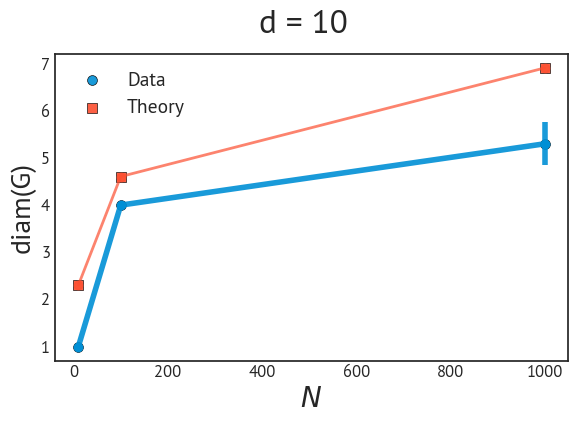

In [559]:
fig, ax = plt.subplots(figsize=(6,4))

x = range_N
exp_diam = [np.log(N) for N in range_N]

y = np.mean(diameter,axis=1)
yerr = np.std(diameter,axis=1)
# ax.axhline(N, ls='--',lw=2,c='black',label=r'N',alpha=0.7,zorder=0)
# ax.axvline(vl, ls='--',lw=2,c='b',label=r'$d_c$',alpha=0.8,zorder=0)
ax.scatter(x,y,s=50,edgecolor='black',label='Data', marker='o',alpha=0.9)
ax.errorbar(x,y,yerr = yerr,marker='o',alpha=0.9)
ax.scatter(x,exp_diam,s=50,edgecolor='black',label='Theory', marker='s',alpha=0.9)
ax.plot(x,exp_diam,marker='o',alpha=0.7,lw=2)
ax.legend()
ax.set_xlabel(r'$N$',fontsize = fs)
ax.set_ylabel(f"diam(G)",fontsize = fs)

fig.text(0.45,1.0,f"d = {d}",fontsize = fs +4)
plt.tight_layout()

We can see something but would need to go to higher $N$ to get a better sense. It takes time though to generate larger ER graphs...

### 4.2 Reciprocity

0.0

In [592]:
range_N =  [10,100,1000,10000]

d = 10 # average degree
S = 10 # number of sampled graph per parameter set (p,N)

D = len(range_N)
reciprocity = np.zeros((D,S)) # size of the largest CC
seeds = np.zeros((D,S)).astype(int) # to be able to replicate the graph

for i, N in enumerate(range_N):
    p = get_p_from_avg_dN(d,N)
    for s in range(S):
        seed = prng.randint(1e5)
        G = nx.fast_gnp_random_graph(N, p, seed=seed, directed=True) # notice the directed == True!

        reciprocity[i,s] = nx.overall_reciprocity(G)



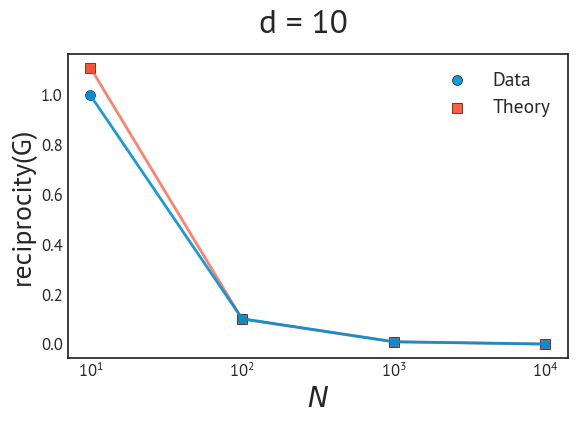

In [593]:
fig, ax = plt.subplots(figsize=(6,4))

x = range_N
exp_r = [get_p_from_avg_dN(d,N) for N in range_N]

y = np.mean(reciprocity,axis=1)
yerr = np.std(reciprocity,axis=1)

ax.scatter(x,y,s=50,edgecolor='black',label='Data', marker='o',alpha=0.9)
ax.errorbar(x,y,yerr = yerr,marker='o',alpha=0.9,lw=2)
ax.scatter(x,exp_r,s=50,edgecolor='black',label='Theory', marker='s',alpha=0.9)
ax.plot(x,exp_r,marker='o',alpha=0.7,lw=2)
ax.legend()
ax.set_xlabel(r'$N$',fontsize = fs)
ax.set_ylabel(f"reciprocity(G)",fontsize = fs)
ax.set_xscale('log')

fig.text(0.45,1.0,f"d = {d}",fontsize = fs +4)
plt.tight_layout()

### 4.3 Clustering coefficent

In [587]:
range_N =  [10,100,1000,10000]

d = 10 # average degree
S = 10 # number of sampled graph per parameter set (p,N)

D = len(range_N)
C = np.zeros((D,S)) # size of the largest CC
seeds = np.zeros((D,S)).astype(int) # to be able to replicate the graph

for i, N in enumerate(range_N):
    p = get_p_from_avg_dN(d,N)
    for s in range(S):
        seed = prng.randint(1e5)
        G = nx.fast_gnp_random_graph(N, p, seed=seed)

        C[i,s] = np.array(list(nx.clustering(G).values())).mean()


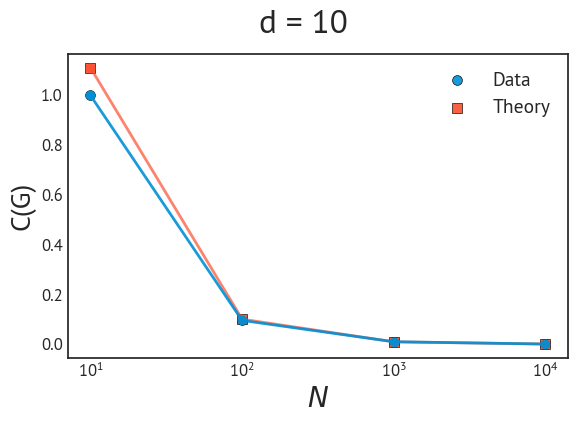

In [590]:
fig, ax = plt.subplots(figsize=(6,4))

x = range_N
exp_C = [get_p_from_avg_dN(d,N) for N in range_N]

y = np.mean(C,axis=1)
yerr = np.std(C,axis=1)

ax.scatter(x,y,s=50,edgecolor='black',label='Data', marker='o',alpha=0.9)
ax.errorbar(x,y,yerr = yerr,marker='o',alpha=0.9,lw=2)
ax.scatter(x,exp_C,s=50,edgecolor='black',label='Theory', marker='s',alpha=0.9)
ax.plot(x,exp_C,marker='o',alpha=0.7,lw=2)
ax.legend()
ax.set_xlabel(r'$N$',fontsize = fs)
ax.set_ylabel(f"C(G)",fontsize = fs)
ax.set_xscale('log')

fig.text(0.45,1.0,f"d = {d}",fontsize = fs +4)
plt.tight_layout()